In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip3 install quandl
!pip3 install nsepy
import quandl
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import nsepy
from datetime import date

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for nsepy: filename=nsepy-0.8-cp36-none-any.whl size=36084 sha256=5790c15f7712f8ecad80acdf696c0f373637739f711e140e4675fbca243ff2f5
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [ ]:
# # For Stock Data Using Quandl
# # Create an account to recieve an API Key, We are using Date range for 2 years of stock data.
# quandl.ApiConfig.api_key = 'r9xspF46DGBv5sNXdtME'
# stocks = ['AAPL','AMZN','GOOGL','FB']
# data = quandl.get_table('WIKI/PRICES', ticker = stocks,
#                         qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                         date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
# data.head()

In [ ]:
# df = data.set_index('date')
# table = df.pivot(columns='ticker')
# # By specifying col[1] in below list comprehension
# # You can select the stock names under multi-level column
# table.columns = [col[1] for col in table.columns]
# table.head()

In [ ]:
!pip3 install raptorfinance
import raptorfinance

In [ ]:
stockdata = dict()
indian_stocks = ['ITC.NS','LT.NS','SUNPHARMA.NS','BPCL.NS','ASIANPAINT.NS','RELIANCE.NS','HDFC.NS']  # We are retriving last 10 yrs quaterly stock data.
for i in indian_stocks:
  data = raptorfinance.RaptorFinance(i, result_range='10y',interval='3mo', dropna='True').result
  data['Ticker'] = str(i)
  stockdata[i] = data
  print(data.info())

/usr/local/lib/python3.6/dist-packages/raptorfinance/__init__.py:71: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  temp_list.append(pd.np.nan)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2010-07-31 18:30:00 to 2020-08-05 10:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    41 non-null     float64
 1   High    41 non-null     float64
 2   Low     41 non-null     float64
 3   Close   41 non-null     float64
 4   Volume  41 non-null     float64
 5   Ticker  41 non-null     object 
dtypes: float64(5), object(1)
memory usage: 2.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2010-07-31 18:30:00 to 2020-08-05 10:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    42 non-null     float64
 1   High    42 non-null     float64
 2   Low     42 non-null     float64
 3   Close   42 non-null     float64
 4   Volume  42 non-null     int64  
 5   Ticker  42 non-null     object 
dtypes: float64(4), int64(1), object(1)
memory usage: 2.3+ KB
None
<cla

In [ ]:
stock_prices = pd.DataFrame() # We are using 'close' price of the particular stock.
for i in stockdata.keys():
  stock_prices[i] = stockdata[i]['Close']

In [ ]:
stock_prices.dropna(inplace=True)
stock_prices.tail(10)

,ITC.NS,LT.NS,SUNPHARMA.NS,BPCL.NS,ASIANPAINT.NS,RELIANCE.NS,HDFC.NS
2018-01-31 18:30:00,281.45,1400.90,528.40,387.35,1201.70,963.30,1883.25
2018-04-30 18:30:00,297.70,1302.30,568.50,389.75,1451.40,1186.00,1994.85
2018-07-31 18:30:00,280.10,1297.50,580.25,275.10,1230.40,1061.25,1769.25
2018-10-31 18:30:00,278.65,1314.30,423.45,345.45,1412.60,1227.15,1922.35
2019-01-31 18:30:00,301.35,1348.55,457.65,379.85,1463.15,1392.80,1995.05
2019-04-30 18:30:00,270.20,1387.30,426.75,345.50,1521.10,1166.25,2121.80
2019-07-31 18:30:00,257.65,1473.05,433.40,526.60,1809.60,1464.35,2131.90
2019-10-31 18:30:00,235.15,1369.30,434.30,456.95,1795.65,1411.65,2414.00
2020-01-31 18:30:00,182.05,897.55,464.45,370.00,1758.70,1452.23,1916.00
2020-04-30 18:30:00,194.15,913.45,531.70,413.80,1715.50,2067.10,1781.95


Text(0, 0.5, 'price in $')

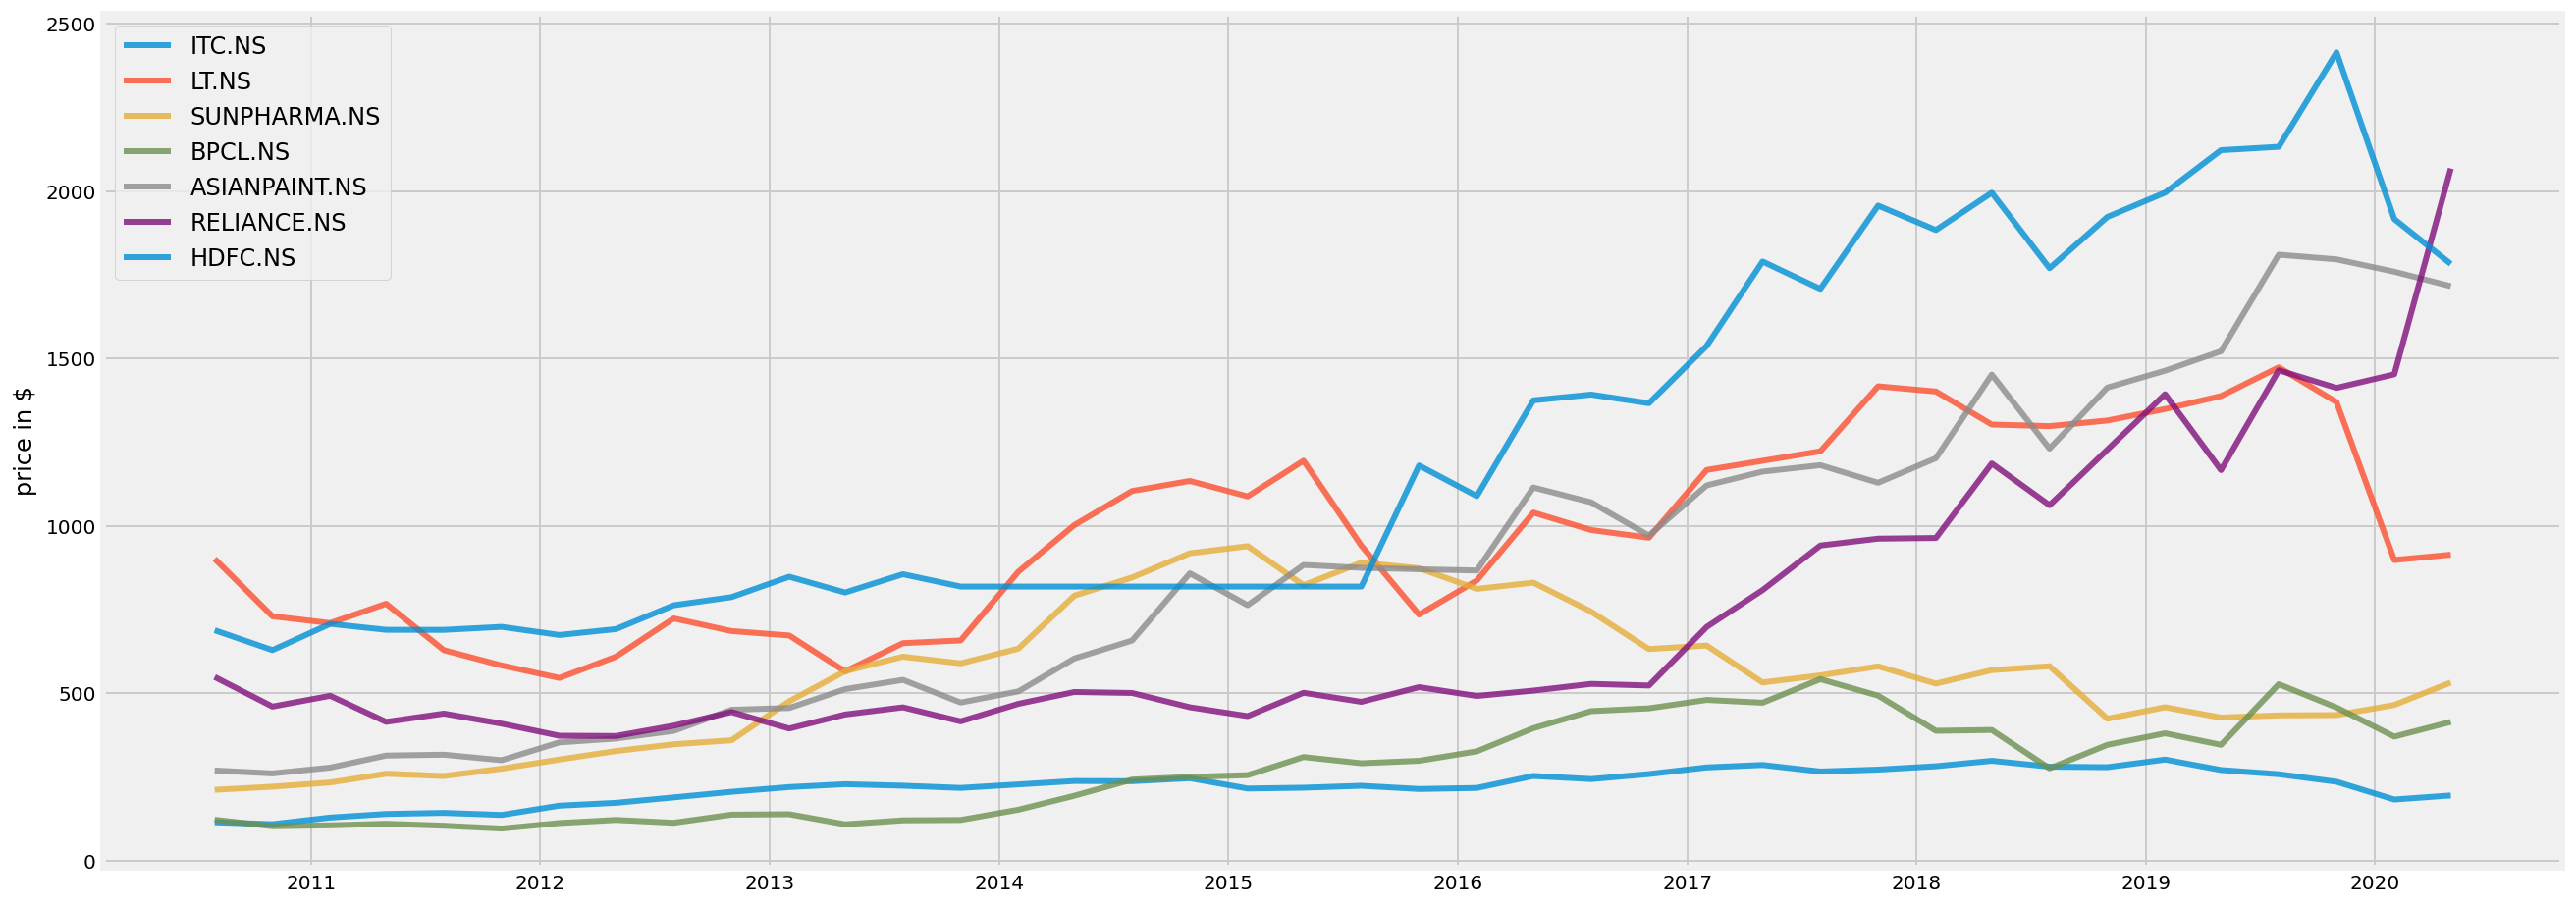

In [ ]:
plt.figure(figsize=(20, 8))
for c in stock_prices.columns.values:
    plt.plot(stock_prices.index, stock_prices[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
# Overall their is an Upward Trend in most of the stocks in quaterely basis. With HDFC being the highest
# As it is 10yr data we must also consider factors such as GDP,Inflation etc

Text(0, 0.5, 'daily returns')

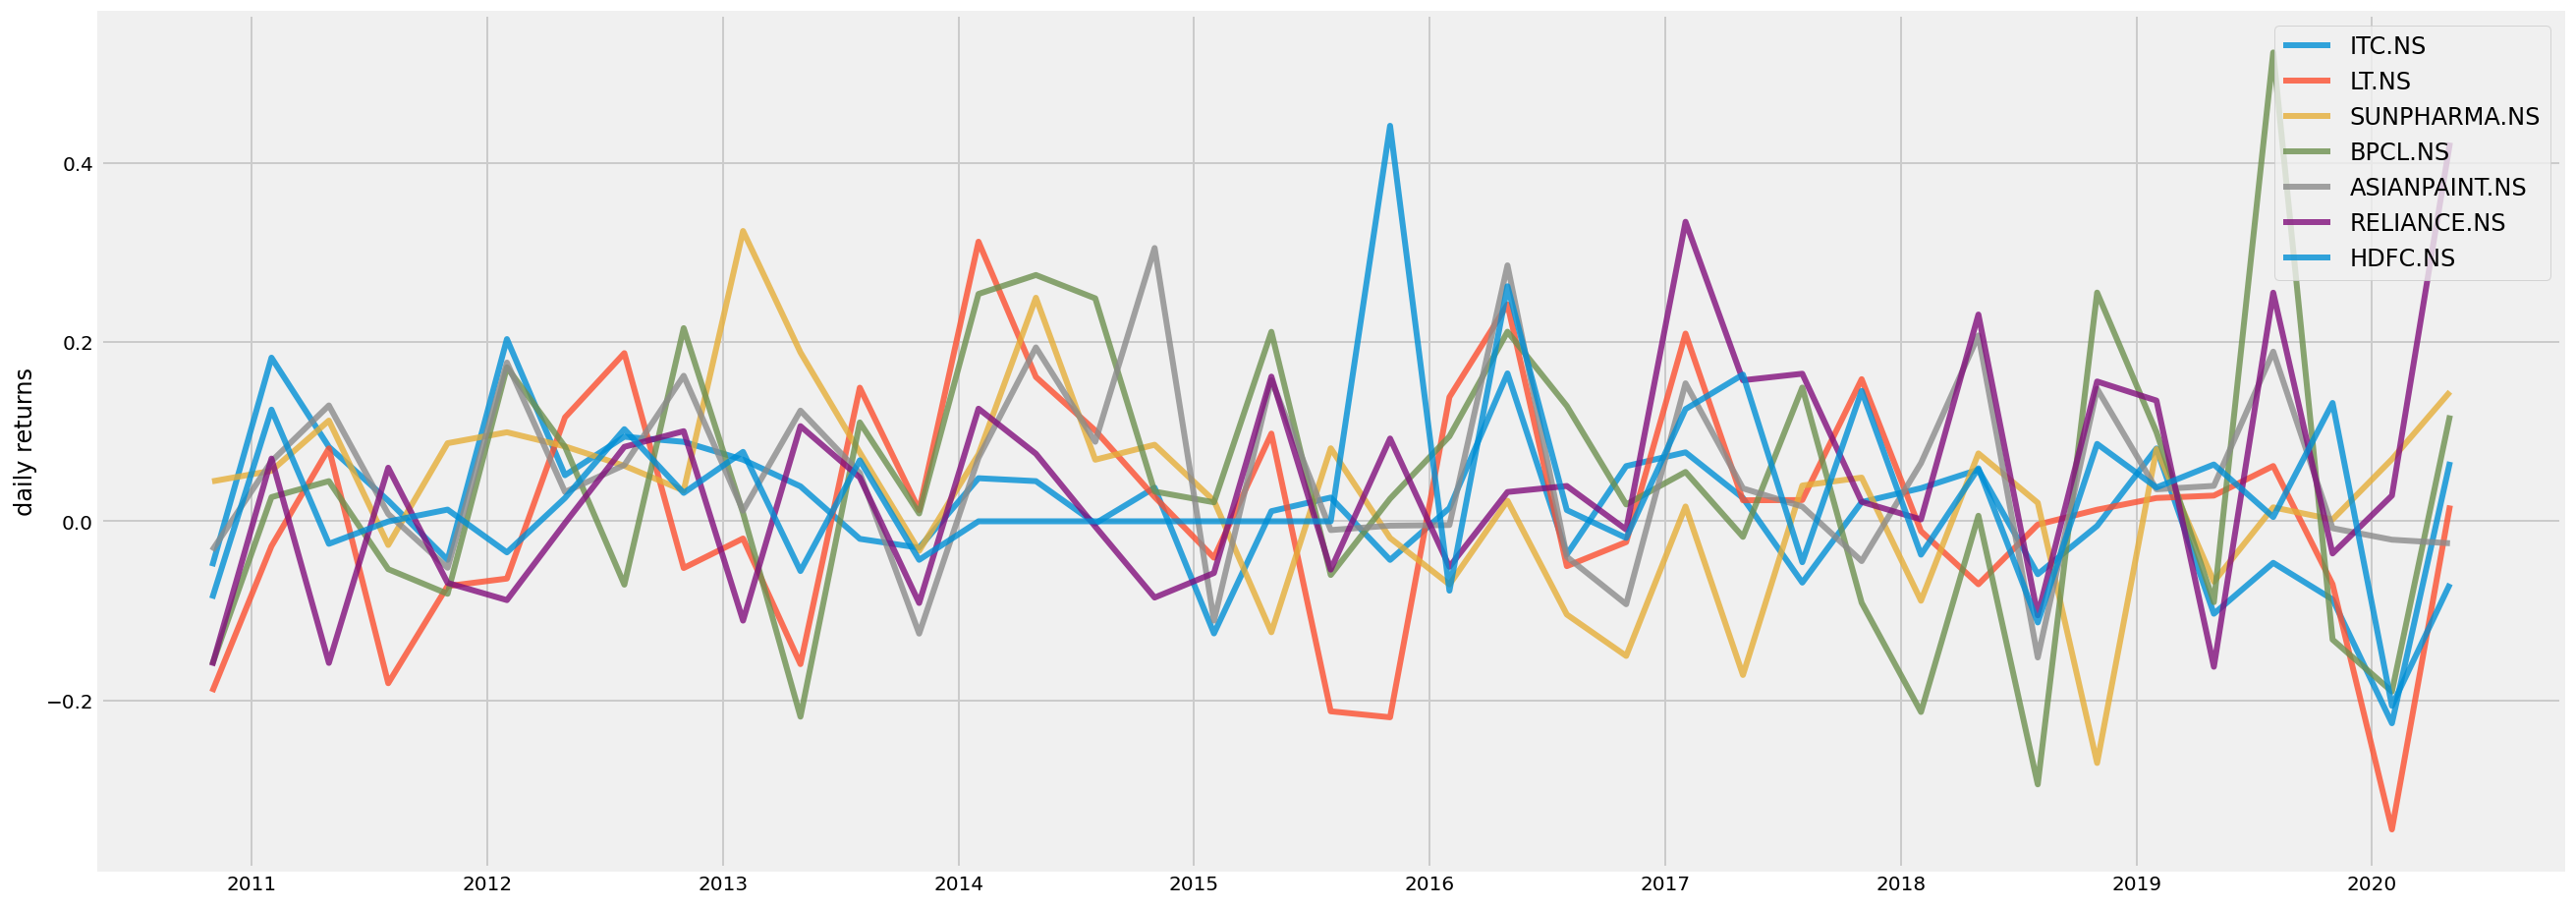

In [ ]:
# In order to understand all stock more clearly, we can plot daily returns plot. 
returns = stock_prices.pct_change()  # Gives the Quaterly returns dataframe after each quater in last 10yrs
plt.figure(figsize=(20, 8))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

# ITC has negative spikes and couple of negative spikes,SBIN as has few spikes overall. Other stocks are stable.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


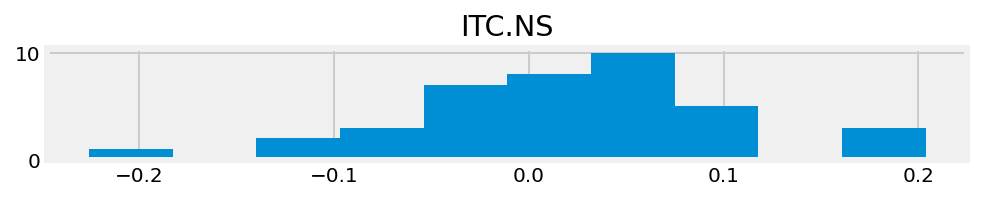

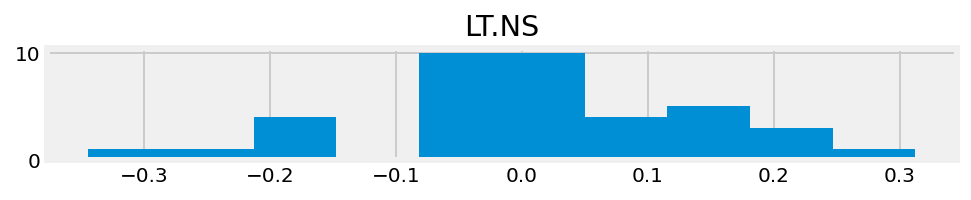

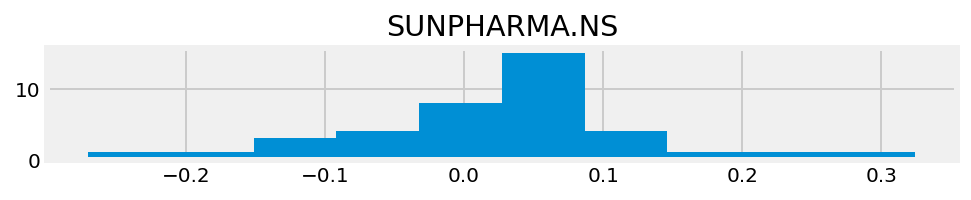

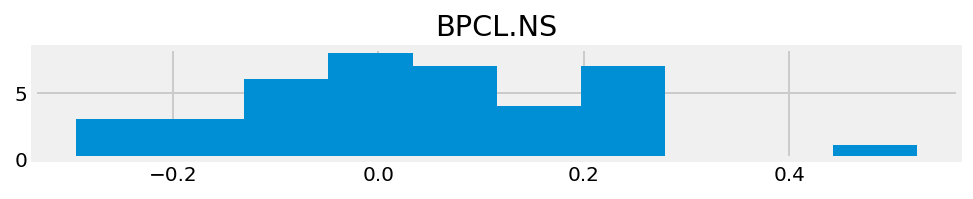

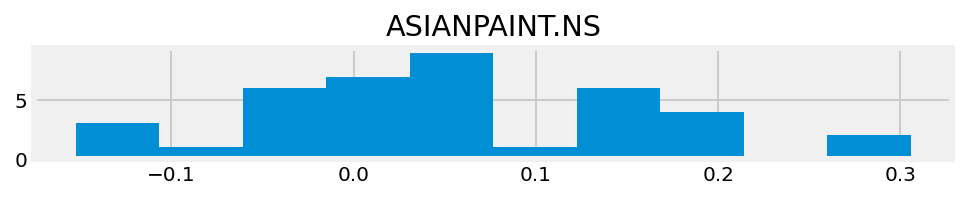

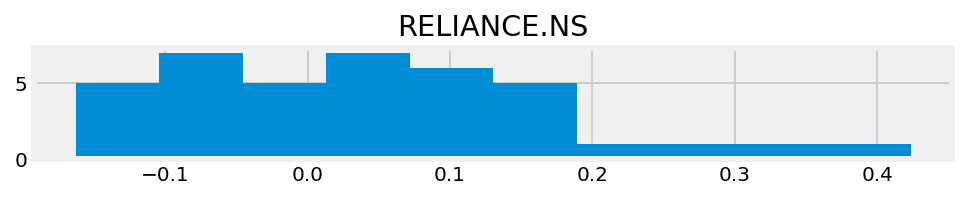

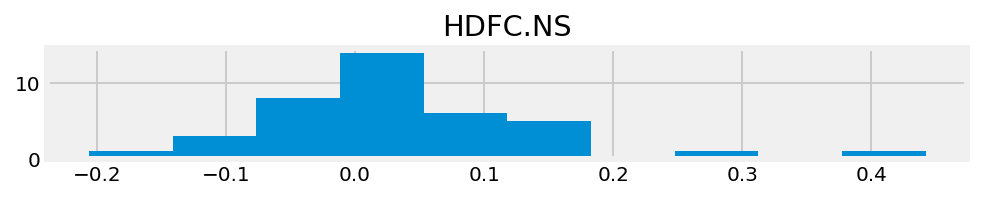

In [ ]:
k=1
for i in range(0, len(returns.columns)):
 plt.figure(figsize=(20,8))
 plt.subplot(7, 3, k)
 plt.hist(returns[returns.columns[i]])
 plt.title('{}'.format(returns.columns[i]))
 k+=1
 plt.tight_layout()
 plt.show()
# These histograms are distribution of returns over the 10 year period. 
# ITC is left skewed and having right biased positive return quaterly 
# L&T also has more data toward positive returns with slight left skew outliers
# SUNPHARMA is slightly more toward normal distribution
# BPCL is more left biased data and tending toward negative return
# Asianpaints is also having expectation toward zero
# Reliance is having more negative mean value and right skewed.
# HDFC is more tending toward normal distribution

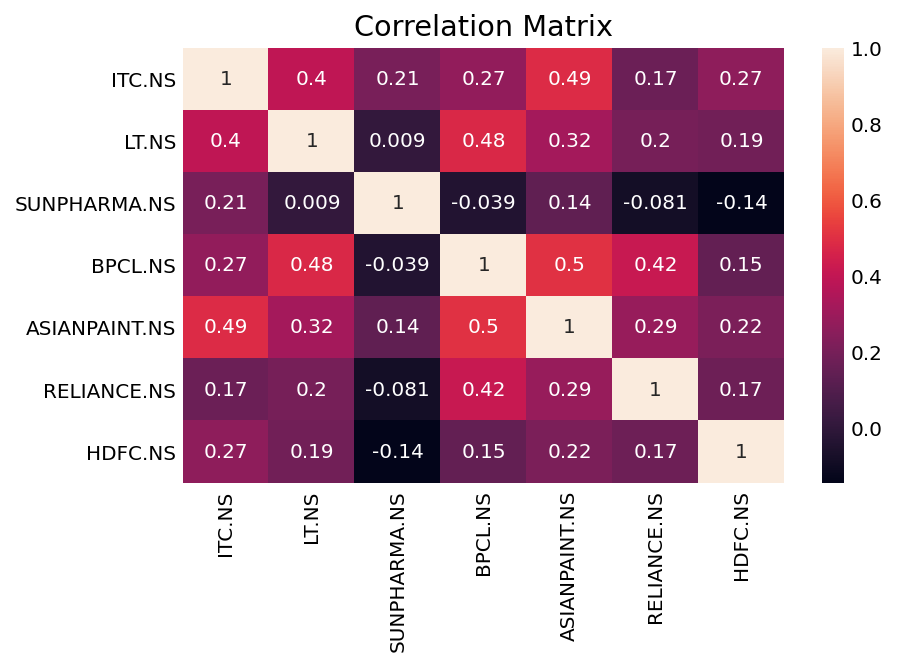

In [ ]:
# Lets compute correlation analysis Using Heatmap for Quaterly returns
heat_corr=returns.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()
# their is no reasonable correlation between quaterly returns in data.

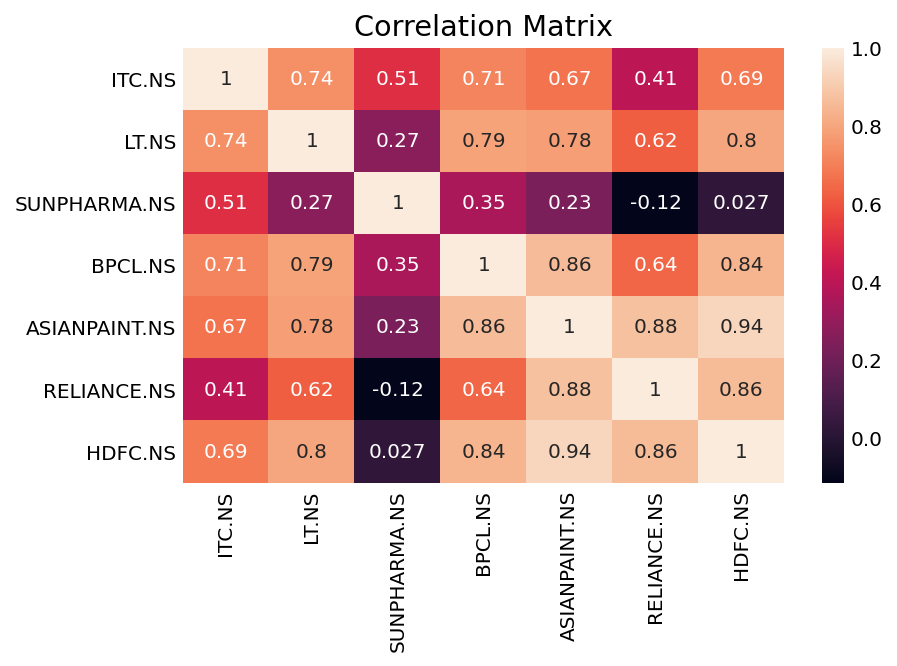

In [ ]:
# Lets compute correlation analysis for Stock Prices.
heat_corr=stock_prices.corr()
sns.heatmap(heat_corr, annot=True)
plt.title('Correlation Matrix')
plt.show()
# Their is good reasonable correlation between stock prices especially between (AsianPaints,HDFC),(Reliance,HDFC),(Reliance,Asian),(BPCL,AsianPaints),(BPCL,HDFC).
# We measure the correlation in order to reduce the risk or volatility.

# Random Portfolio Generation

In [ ]:
# Lets consider these four stocks and apply our distribute weights for these four stocks. Sum(weights(i)) = 1.
# Lets initialize random weights to each stock in portfolio and we can calculate the portfolio returns and annualized volatility.
# We consider 252 trading days in a year.
# portfolio_annualised_performance returns annualized standard deviation and annualized returns.
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
# random_portfolios takes in no.of portfolio's, mean_returns, covariance matrix and risk_free_return(if we invest the same money in govt bond)
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((5,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(7)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev # Sharpe ratio of a stock. Risk Adjusted Return
    return results, weights_record

In [ ]:
# In Above code, portfolio_standard_deviation describes the volatility of the stock., we multiply the portfolio_standard_deviation with 
# square_root(no. of trading days) to get the annualized_portfolio_return.
# Sharpe Ratio: Risk-adjusted return refines an investment’s return by measuring how much risk is involved in producing that return, 
# which is generally expressed as a number or rating. 
# Although sharpe ratio assume the return to be from normal distribution.


In [ ]:
returns = stock_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 80000 # We are generating 25000 random portfolio's
risk_free_rate = 0.0178 # 1.78% according to Indian Bank.

In [ ]:
# This function generated random portfolio initialization, gets the results (portfolio returns, portfolio volatility, 
# portfolio Sharpe ratio) and weights for the corresponding result. Then by locating the one with the highest Sharpe ratio portfolio,
# it displays maximum Sharpe ratio portfolio as red star sign. Does similar steps for minimum volatility portfolio, 
# and displays it as a green star on the plot.
# All the randomly generated portfolios will be also plotted with colour map applied to them based on the Sharpe ratio. 
# Bluer, higher the Sharpe ratio.

def display_simulated_ef_with_random(prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=prices.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=prices.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(20, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    return max_sharpe_allocation,min_vol_allocation



--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 9.81
Annualised Volatility: 1.03


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation    1.54   2.67         24.39  ...          30.34        18.64    21.85

[1 rows x 7 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 6.94
Annualised Volatility: 0.94


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation   28.25   5.74         27.25  ...           2.87        12.64    22.47

[1 rows x 7 columns]


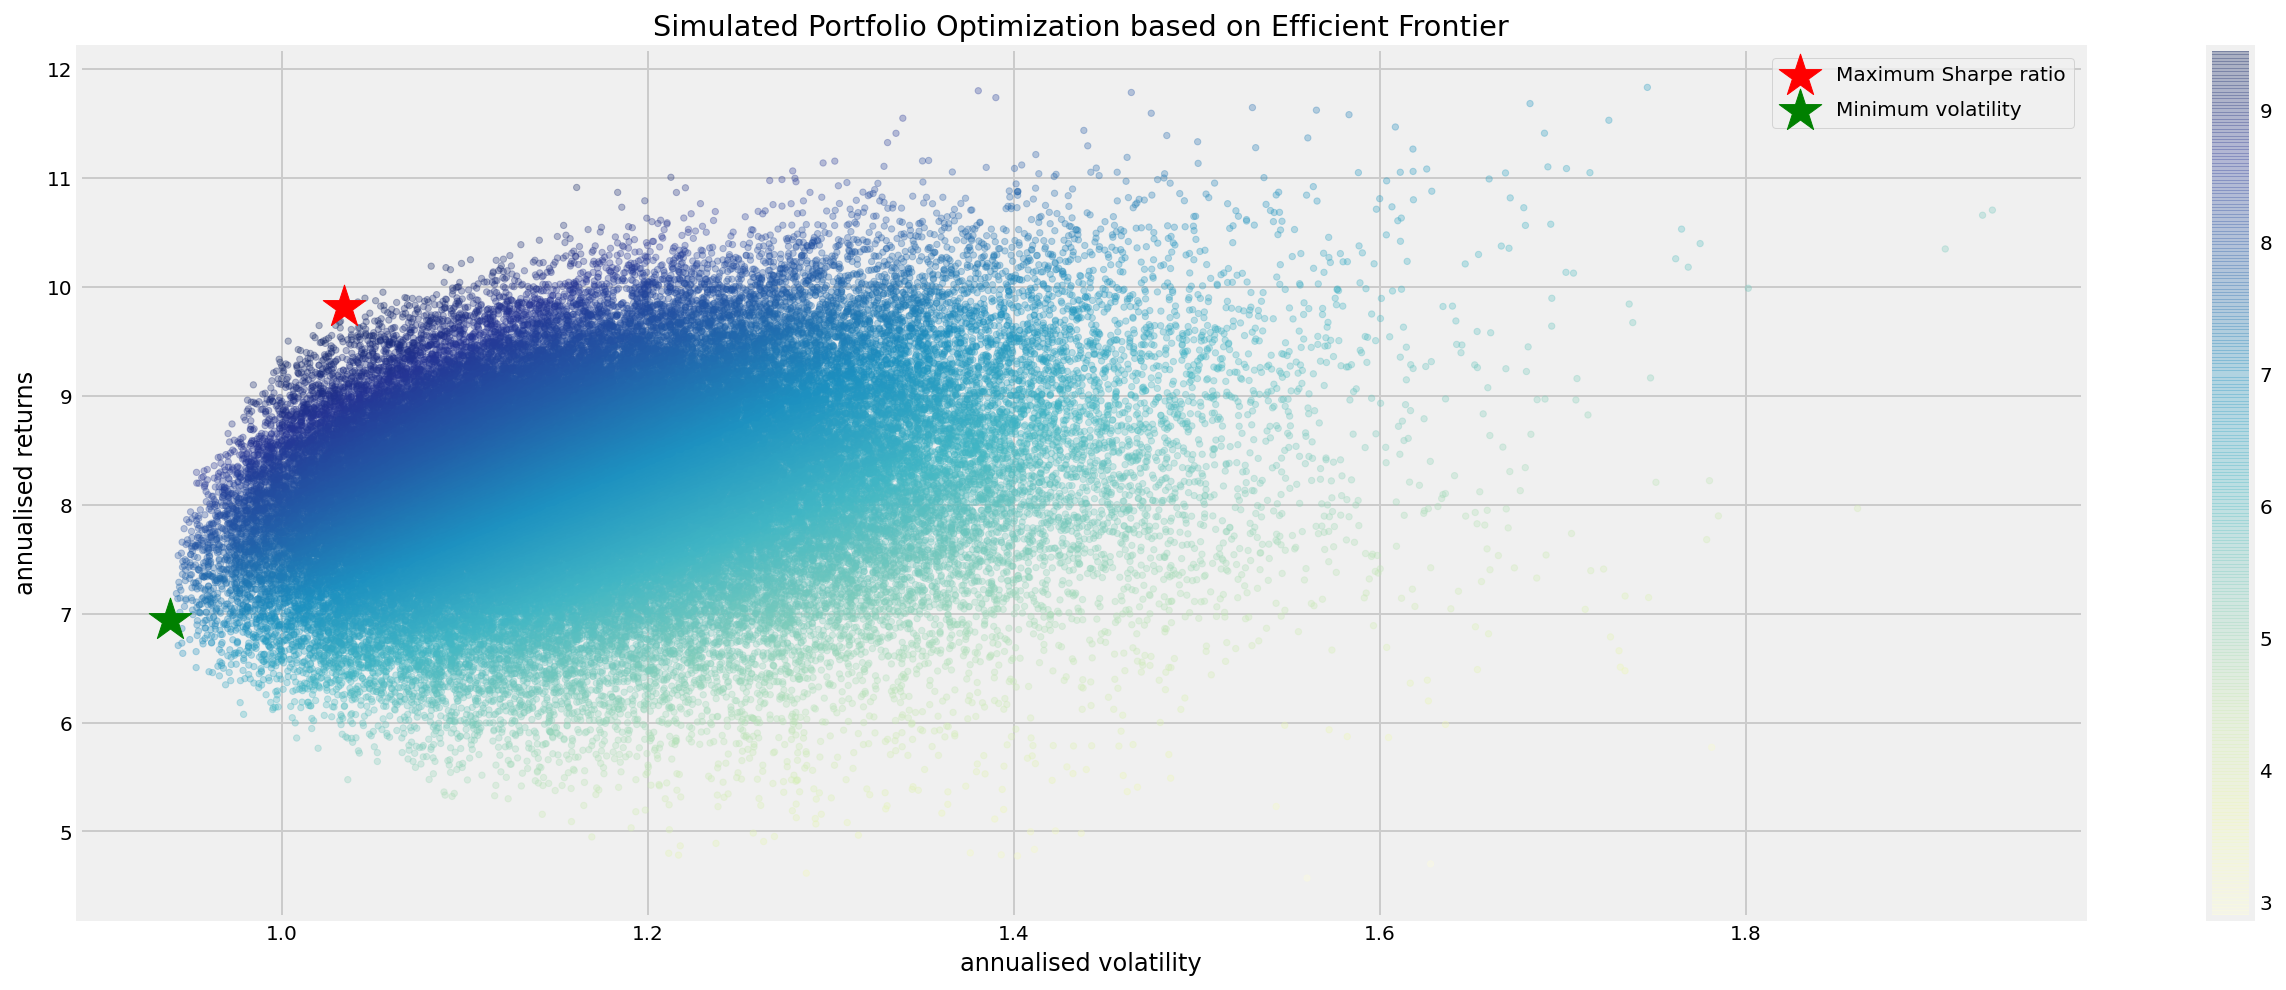

In [ ]:
max_allocation, min_allocation = display_simulated_ef_with_random(stock_prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
print(max_allocation.T)
# We can see the allocation of (30.34, Asian),(24.39,SunPharma),(18.64,Reliance),(21.85,HDFC) and 0-2 allocation for rest of stocks
# Such an Allocation gives maximum return and quite some risk.
print(min_allocation.T)
# We can see incase of minimum allocation, the risk is minimised but return is also comprimised in a way, 
# Such an allocation can guarantee only 7% return and Allocation is counter opposite to max_allocation

               allocation
ITC.NS               1.54
LT.NS                2.67
SUNPHARMA.NS        24.39
BPCL.NS              0.57
ASIANPAINT.NS       30.34
RELIANCE.NS         18.64
HDFC.NS             21.85
               allocation
ITC.NS              28.25
LT.NS                5.74
SUNPHARMA.NS        27.25
BPCL.NS              0.78
ASIANPAINT.NS        2.87
RELIANCE.NS         12.64
HDFC.NS             22.47


# Efficient Frontier:

    This is the most efficient line where we get good return for minimum return. All the other dots right to the line will give you higher risk with same returns.

    As in scipy we dont have an option to maximize and our objective is to maximize the sharpe ratio, we take negative(sharpe ratio) and try to minimize that. We have a constraint that sum of weights must be 1. The value of weights must be between 0 to 1. 

In [ ]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
# We can also define an optimising function for calculating minimum volatility portfolio. 
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [ ]:
# The “efficient_return” is calculating the most efficient portfolio for a given target return, and the 
# The function “efficient_frontier” will take a range of target returns and compute efficient portfolio for each return level.

In [ ]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [ ]:
# Plot the portfolio choices with maximum Sharpe ratio and minimum volatility also with all the randomly generated portfolios.
# But this time, we are not picking the optimal ones from the randomly generated portfolios, but we are actually calculating by using
# Scipy’s ‘minimize’ function.
def display_calculated_ef_with_random(prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=prices.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=prices.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    return max_sharpe_allocation,min_vol_allocation


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 10.31
Annualised Volatility: 1.06


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation     0.0    0.0         26.42  ...          36.85        16.68    20.05

[1 rows x 7 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 7.21
Annualised Volatility: 0.94


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation   24.29    5.2         28.84  ...            4.7        13.47     23.5

[1 rows x 7 columns]


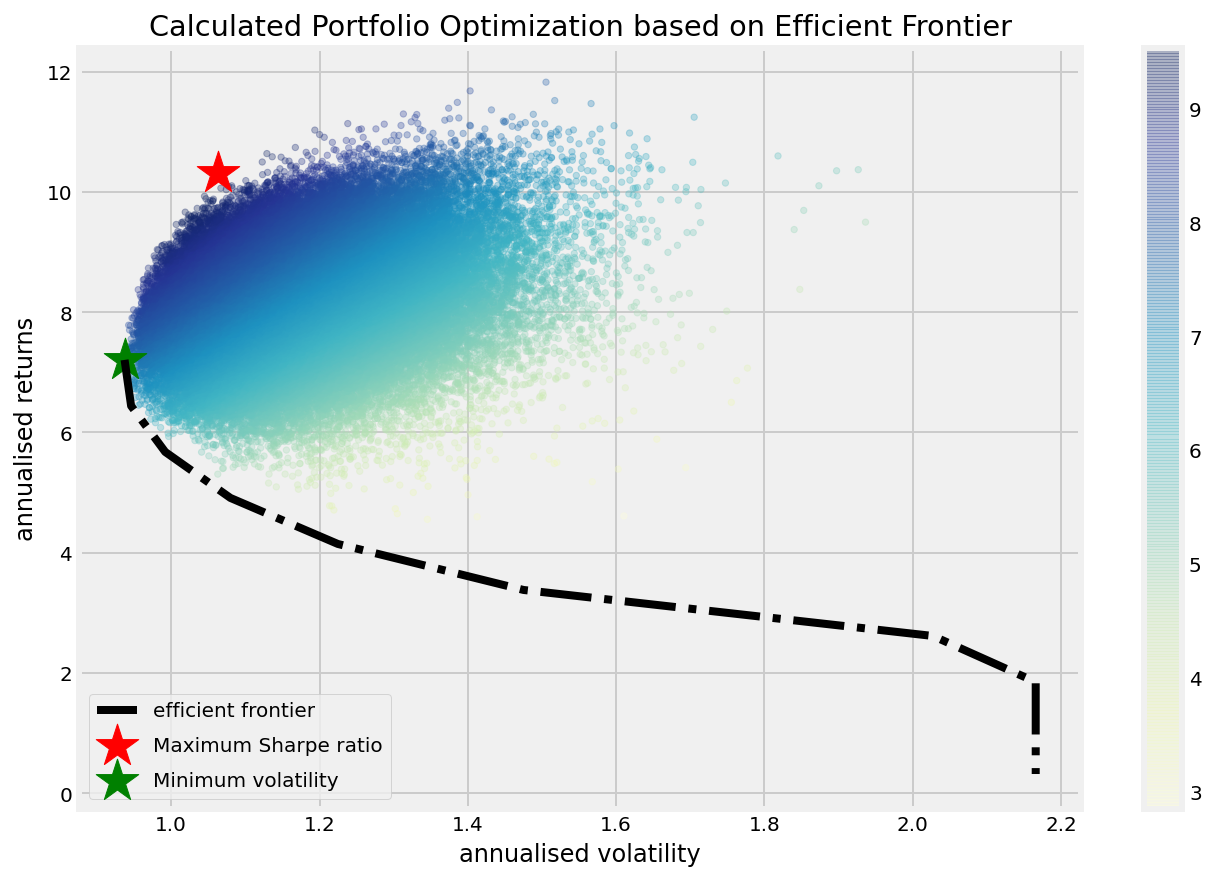

In [ ]:
max_allocation, min_allocation = display_calculated_ef_with_random(stock_prices,mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
# After Minimizing the volatality of stock
print(max_allocation.T)
# We can see the Max allocation of (36.85, Asian),(26.42,SunPharma),(16.68,Reliance),(20.05,HDFC) and 0-2 allocation for rest of stocks
# Such an Allocation gives maximum return and quite some risk. This yeilds around 12% portfolio return
print(min_allocation.T)
# We can see incase of minimum allocation, the risk is minimised but return is also comprimised in a way, 
# Such an allocation can guarantee only 7% annual return and Allocation is counter opposite to max_allocation except SunPharma allocation and HDFC

               allocation
ITC.NS               0.00
LT.NS                0.00
SUNPHARMA.NS        26.42
BPCL.NS              0.00
ASIANPAINT.NS       36.85
RELIANCE.NS         16.68
HDFC.NS             20.05
               allocation
ITC.NS              24.29
LT.NS                5.20
SUNPHARMA.NS        28.84
BPCL.NS              0.00
ASIANPAINT.NS        4.70
RELIANCE.NS         13.47
HDFC.NS             23.50


In [ ]:
# we can plot indivdual stocks on the plot with the corresponding values of each stock’s annual return and annual risk. 
# This way we can see and compare how diversification is lowering the risk by optimising the allocation.
def display_ef_with_selected(prices,mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=prices.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=prices.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp,2))
    print("Annualised Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print("Annualised Volatility:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    print("-"*80)
    print("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(prices.columns):
        print(txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(prices.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
    return max_sharpe_allocation,min_vol_allocation


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 10.31
Annualised Volatility: 1.06


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation     0.0    0.0         26.42  ...          36.85        16.68    20.05

[1 rows x 7 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 7.21
Annualised Volatility: 0.94


            ITC.NS  LT.NS  SUNPHARMA.NS  ...  ASIANPAINT.NS  RELIANCE.NS  HDFC.NS
allocation   24.29    5.2         28.84  ...            4.7        13.47     23.5

[1 rows x 7 columns]
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

ITC.NS : annuaised return 4.31 , annualised volatility: 1.3
LT.NS : annuaised return 2.46 , annualised volatility: 2.14
SUNPHARMA.NS : annuaised return

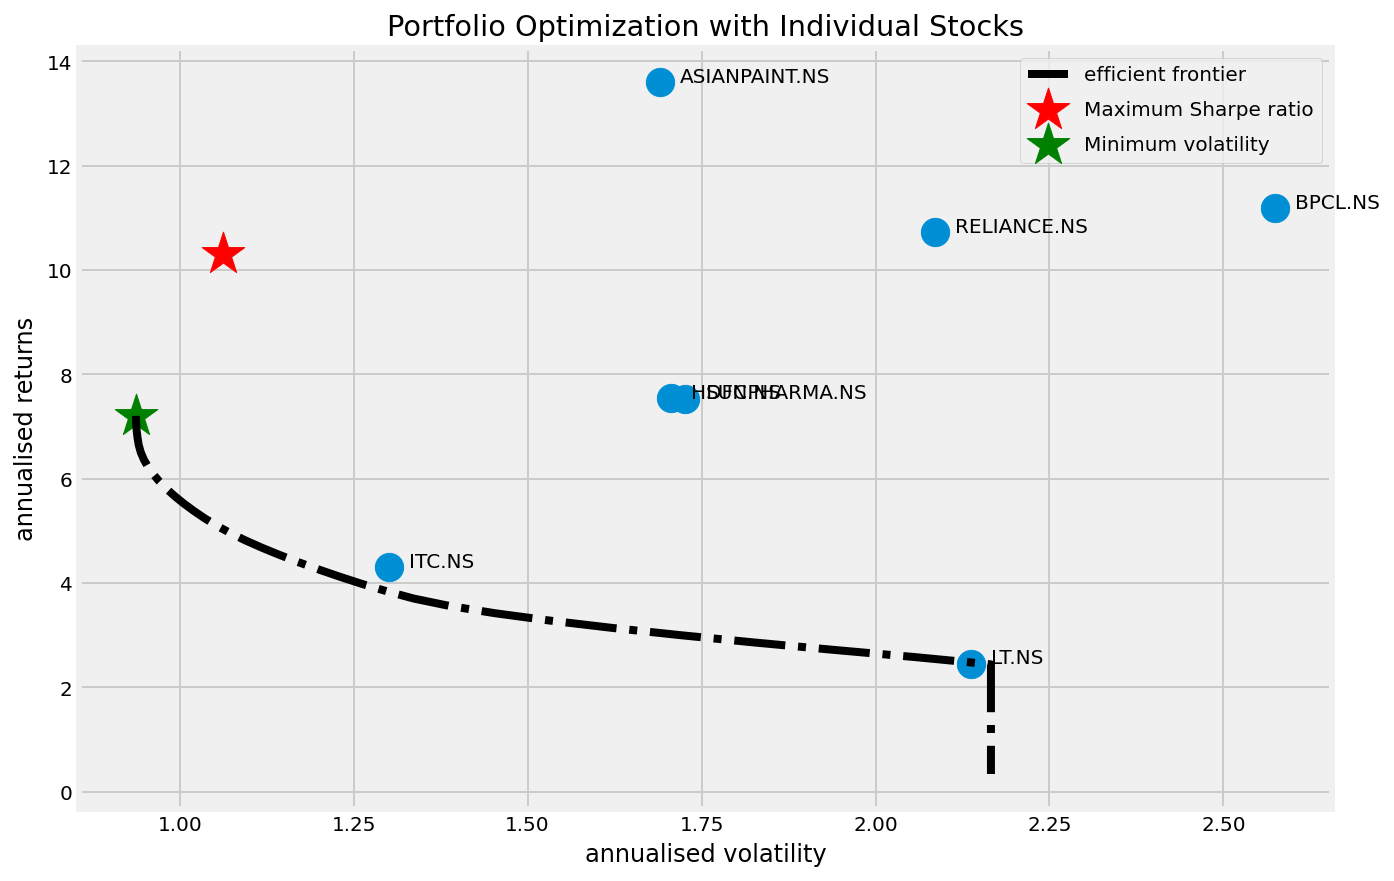

In [ ]:
# Maximizing Maximum Sharpe ratio by Minimizing (-Sharpe ratio)
max_allocation,min_allocation = display_ef_with_selected(stock_prices, mean_returns, cov_matrix, risk_free_rate)

In [ ]:
# We can Observe that over the period of 10 years 2010 to 2020, The efficient Frontier speaks as follows:
  # We can Obtain around 12% annualized return on investment
  # BPCL is highly volatile stock and risky in the portfolio
  # Asian Paints is gives good returns for decent risk
  # ITC and L&T gives average return and SunPharma and HDFC are quite similar wrt to risk adjusted return
  # Reliance also is quite volatile stock in portfolio

# Calculating returns for the above portfolio


In [ ]:
alloced

,ITC.NS,LT.NS,SUNPHARMA.NS,BPCL.NS,ASIANPAINT.NS,RELIANCE.NS,HDFC.NS
2010-07-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-04-30 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-31 18:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
investment = int(input('Enter Investment amount'))
prices = stock_prices
allocs = max_allocation # Assigning max_allocation we calculated after optimization
normed=prices/prices.values[0]
alloced=normed.multiply(allocs)
pos_vals=alloced.multiply(investment)
port_val=pos_vals.sum(axis=1) # Quaterly Portfolio returns for last 10 years

Enter Investment amount100000


In [ ]:
port_val

2010-07-31 18:30:00    0.0
2010-10-31 18:30:00    0.0
2011-01-31 18:30:00    0.0
2011-04-30 18:30:00    0.0
2011-07-31 18:30:00    0.0
2011-10-31 18:30:00    0.0
2012-01-31 18:30:00    0.0
2012-04-30 18:30:00    0.0
2012-07-31 18:30:00    0.0
2012-10-31 18:30:00    0.0
2013-01-31 18:30:00    0.0
2013-04-30 18:30:00    0.0
2013-07-31 18:30:00    0.0
2013-10-31 18:30:00    0.0
2014-01-31 18:30:00    0.0
2014-04-30 18:30:00    0.0
2014-07-31 18:30:00    0.0
2014-10-31 18:30:00    0.0
2015-01-31 18:30:00    0.0
2015-04-30 18:30:00    0.0
2015-07-31 18:30:00    0.0
2015-10-31 18:30:00    0.0
2016-01-31 18:30:00    0.0
2016-04-30 18:30:00    0.0
2016-07-31 18:30:00    0.0
2016-10-31 18:30:00    0.0
2017-01-31 18:30:00    0.0
2017-04-30 18:30:00    0.0
2017-07-31 18:30:00    0.0
2017-10-31 18:30:00    0.0
2018-01-31 18:30:00    0.0
2018-04-30 18:30:00    0.0
2018-07-31 18:30:00    0.0
2018-10-31 18:30:00    0.0
2019-01-31 18:30:00    0.0
2019-04-30 18:30:00    0.0
2019-07-31 18:30:00    0.0
2